# Handle Missing Values #

In [8]:
import sys
sys.path.append('..')

from src.loader import InsuranceCrossSellingDataset
from src.analyse import InsuranceDataProcessor
from src.featureEngineering import FeatureEngineering
import matplotlib.pyplot as plt

In [9]:
data_loader = InsuranceCrossSellingDataset(data_dir='../data')
train_df, test_df, submission_df = data_loader.load_data()

Téléchargement des données avec l'API Kaggle...
Les fichiers de données existent déjà, pas de téléchargement.
Données téléchargées et chargées avec succès.


# Detecting Outliers #

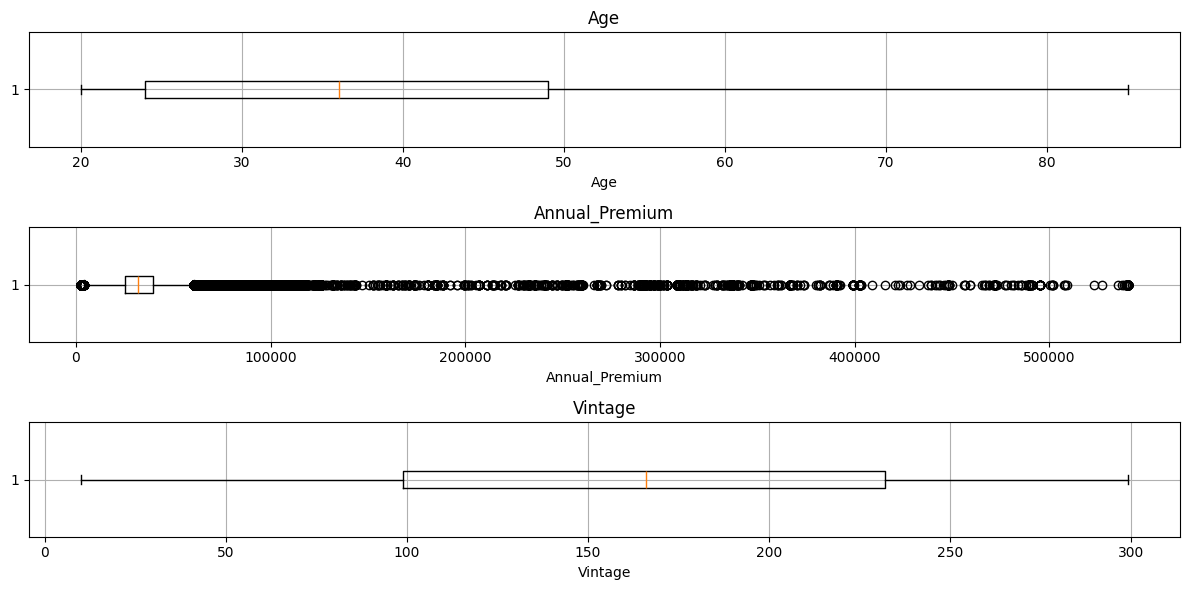

In [10]:
fig, axs = plt.subplots(3, 1, figsize=(12, 6))

# numerical features
features = ['Age', 'Annual_Premium', 'Vintage']
for ax, ft in zip(axs, features):
    ax.boxplot(train_df[ft], vert=False)
    ax.set_title(ft)
    ax.grid(True)
    ax.set_xlabel(ft)

plt.tight_layout()
plt.show()


In [11]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [13]:
ft = FeatureEngineering()

In [14]:
# Encode Binary and Ordinal features
encoded_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
train_df[encoded_cols] = ft.ordinalEncoding(train_df[encoded_cols])

#Encode Categorical 
encoded_cols = ['Region_Code', 'Policy_Sales_Channel', 'Vintage']
train_df[encoded_cols] = ft.categoricalEncoding(train_df[encoded_cols])

In [15]:
columns = train_df.columns.drop('id').tolist()
train_df = ft.normalize_feature(train_df, columns, True)

In [16]:
processor = InsuranceDataProcessor()
train_stats = processor.analyze_dataset(train_df,'train_dataset')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                float64
 2   Age                   float64
 3   Driving_License       float64
 4   Region_Code           float64
 5   Previously_Insured    float64
 6   Vehicle_Age           float64
 7   Vehicle_Damage        float64
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               float64
 11  Response              float64
dtypes: float64(11), int64(1)
memory usage: 1.0 GB

train_dataset - Data overview:
   id  Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0   0     1.0  0.015385              1.0     0.660377                 0.0   
1   1     1.0  0.353846              1.0     0.528302                 0.0   
2   2     0.0  0.076923              1.0     0.264151                 1.0   
3   

# Pearson Correlation #

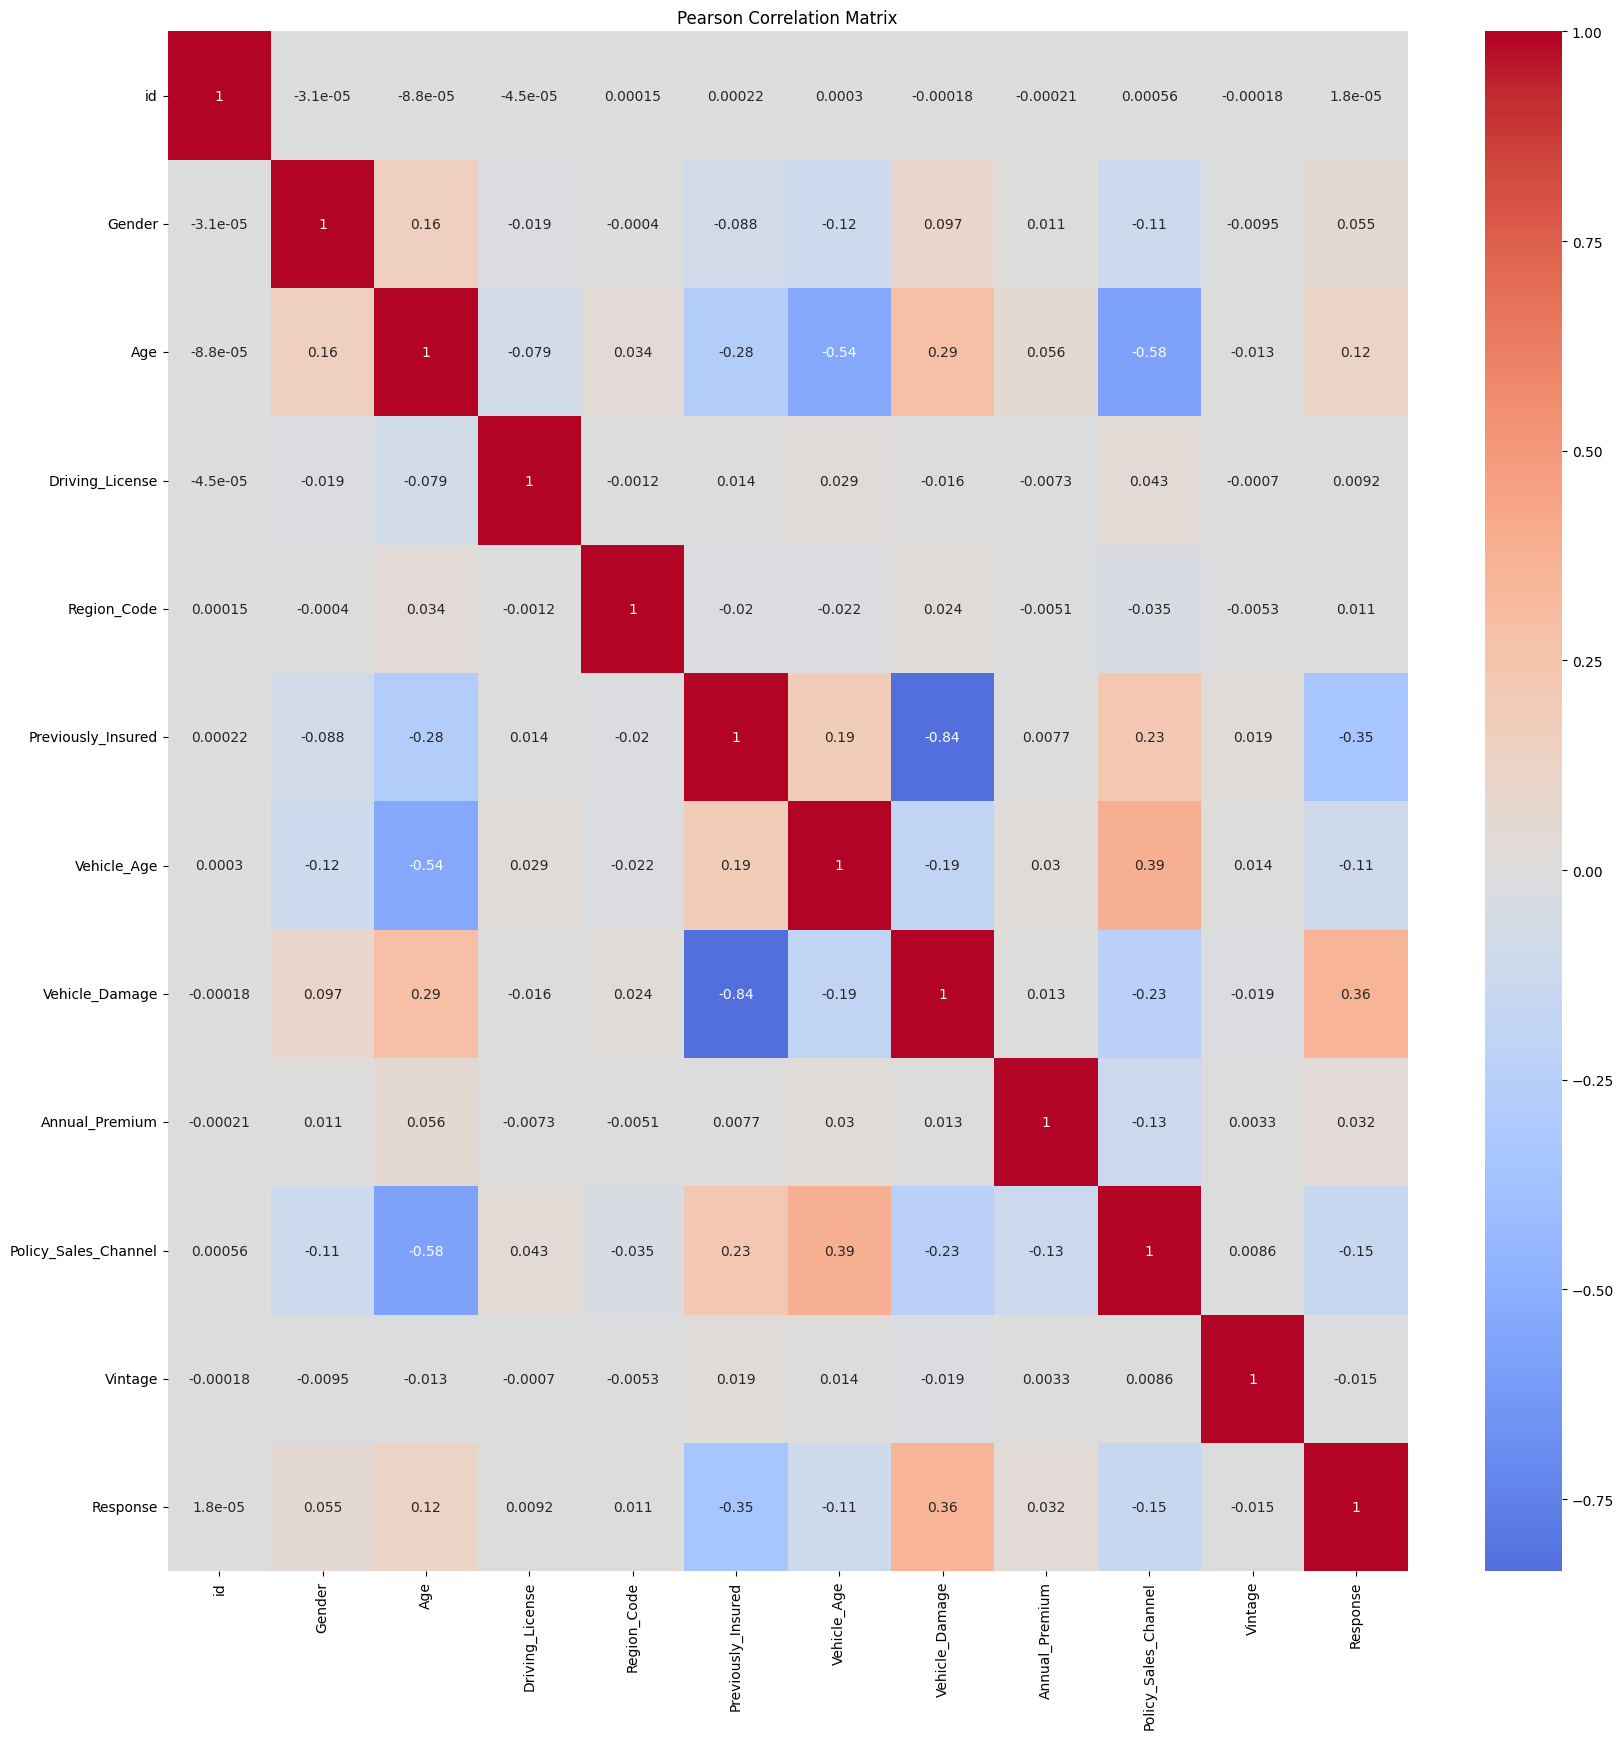

In [17]:
import seaborn as sns

# Calculate the Pearson correlation matrix
train_df.head()
corr_matrix = train_df.corr(method='pearson')
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson Correlation Matrix")
plt.show()